In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [7]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Dist plot 
`it allows us to show distribution of a univariate(single variable) set of observations`

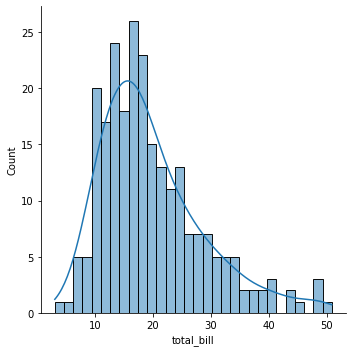

In [20]:
sns.displot(tips['total_bill'],kde=True,bins=30) #the graph line shows kde. kernal density estimation

## Joint Plot

`Uses for bivariate data. Combines two distplot`

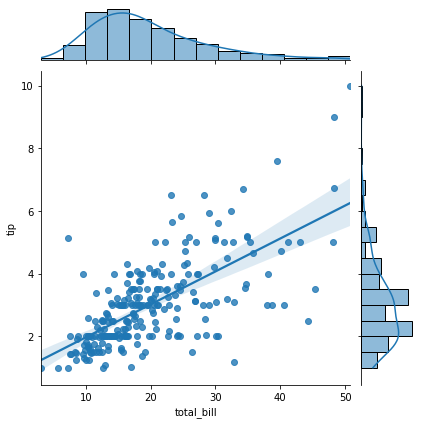

In [26]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg') # we are comapring two distribution plot
# we are comparing two columns and tips is name of dataset

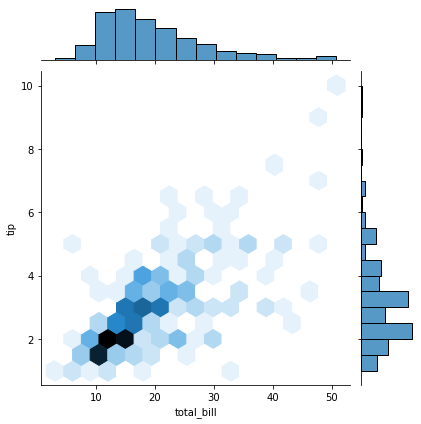

In [27]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

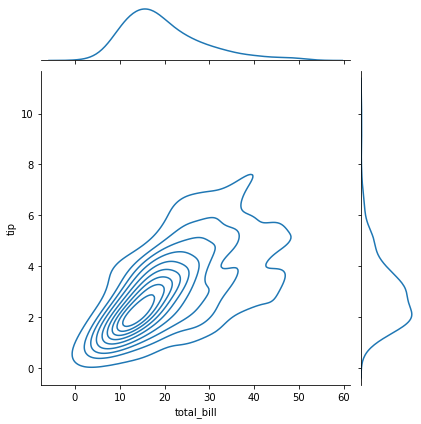

In [28]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

### PAIRPLOT - 
`Plot pairwise relationships in a dataset. It shows relationship of evey column with other column`

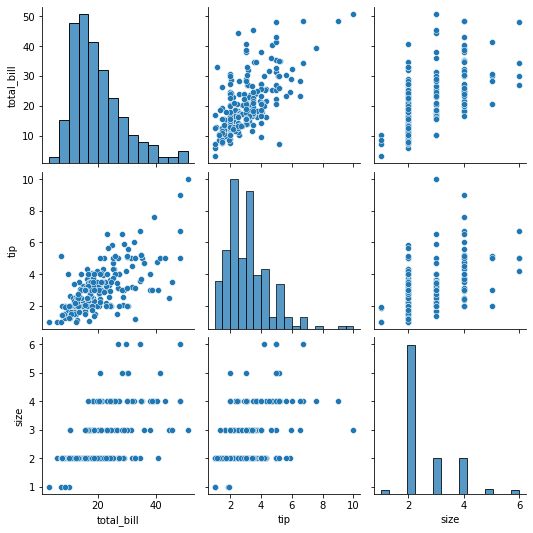

In [32]:
sns.pairplot(tips)

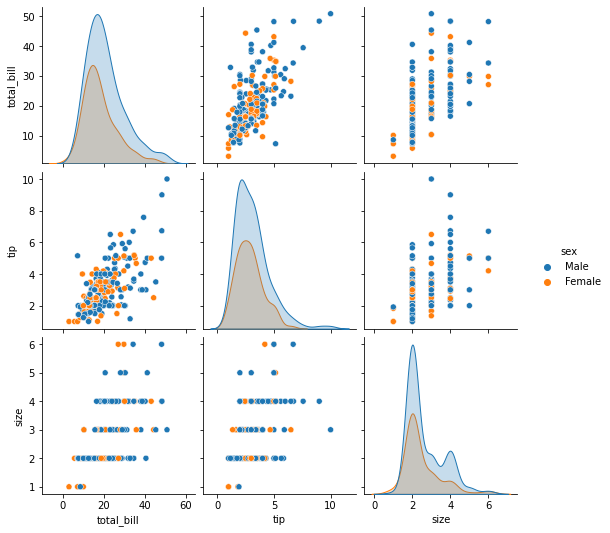

In [36]:
sns.pairplot(tips,hue='sex')

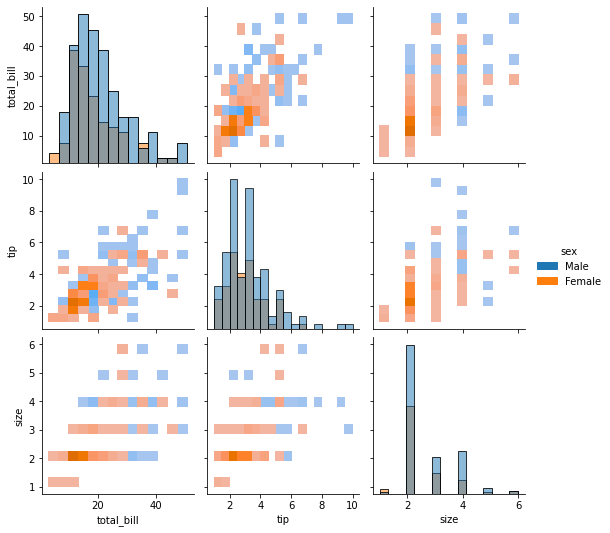

In [39]:
sns.pairplot(tips,hue='sex',kind='hist')


## RugPlot. 
`It draws dashes on every point`

<AxesSubplot:xlabel='total_bill'>

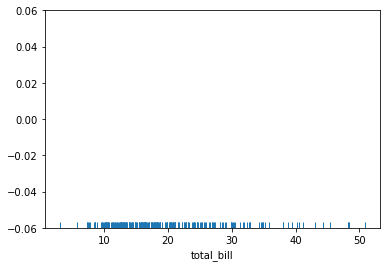

In [40]:
sns.rugplot(tips['total_bill'])

C:\Users\Sumit\anaconda3\envs\cv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

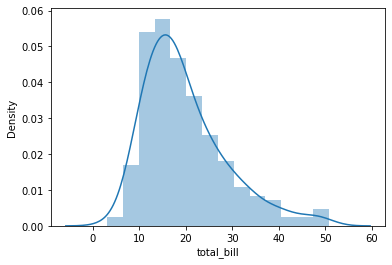

In [42]:
sns.distplot(tips['total_bill'])

# Kernel  Density estimation - KDE

#### plotting normal distribution for rug plot points

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [47]:
## Creating the dataset
dataset = np.random.randn(25)

In [48]:
dataset

array([-0.52866799, -0.27744417,  0.01486915,  1.6331216 ,  0.1834255 ,
        0.95774999,  0.82761291, -0.16054455,  1.20347053,  1.27139415,
       -0.05023855, -0.70972646, -0.30015717,  0.2573284 ,  0.86498973,
       -2.44584732,  1.16700659,  0.80312379,  2.41852281, -0.03506569,
       -0.32283103,  2.06315124, -0.77986582, -1.19516388, -0.09257173])

<AxesSubplot:>

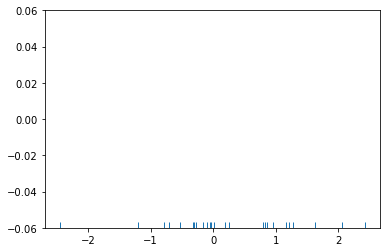

In [49]:
# creating the rugplot
sns.rugplot(dataset)

In [55]:
# set up the axis for the plot
x_min = dataset.min()-2
x_max = dataset.max()+2

In [56]:
print(x_min)
print(x_max)

-4.445847319149845
4.418522809710304


In [59]:
# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

In [60]:
# setting up the bandwidth
url = 'https://en.wikipedia.org/wiki/Kernel_density_estimation#practical_estimation_of_the_bandwidth'


In [61]:
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2 #std = standard deviation

In [62]:
bandwidth

0.5843638697118252

(0.0, 1.0)

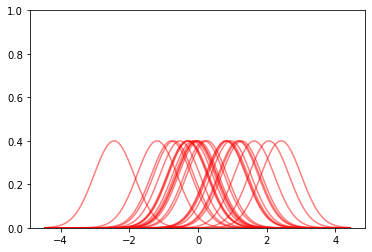

In [70]:
## Create an empty kernel list
kernel_list =[]

#plot each basis function
for data_points in dataset:

    #create a kernel for each point and appened to list
    kernel = stats.norm(data_points,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
#     print(kernel_list)
    
    # scale for plotting
    kernel = kernel/kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color='red',alpha=0.5)
    
plt.ylim(0,1)


Text(0.5, 0.98, 'Sum of the Basis Functions')

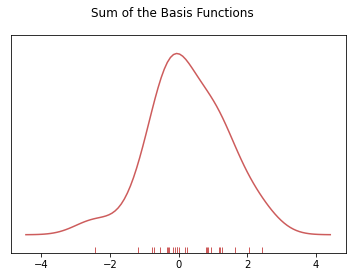

In [71]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

In [ ]:
! git add Seaborn_typesofplots.ipynb
! git commit -m "13:55/06-06-2021"
! git push origin main